# Name: V Raghav Anand

# Register Number: 19BCE1415

# Machine Learning Lab (CSE4020)

# Faculty: Prof. Abdul Quadir MD

# LOGISTIC REGRESSION EXERCISE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### Problem statement is to predict if the customer purchased a product or not

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Dropping the User ID column (unnecessary for training the dataset)

In [5]:
df=dataset.drop('User ID',axis=1)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


### Pairplot

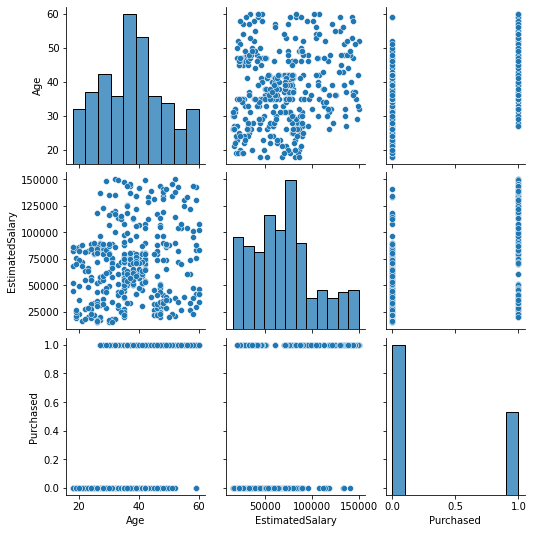

In [6]:
import seaborn as sb
sb.pairplot(df)

In [7]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

### Converting the string column (gender) into numeric format

In [8]:
gender = df['Gender'].tolist()
gender=set(gender)
gender_set={}
temp=1
for i in gender:
    gender_set[i]=temp
    temp+=1
df.Gender = [gender_set[item] for item in df.Gender]
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0


### Correlation heatmap

<AxesSubplot:>

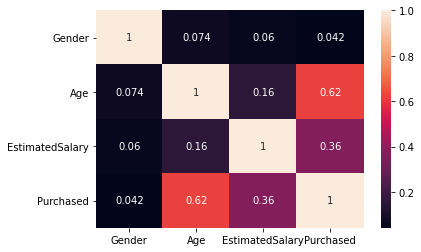

In [9]:
data_corr = df.corr()
sb.heatmap(data_corr,annot=True)

### Checking for missing values if any

In [10]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Splitting the dependent and independent variables

In [11]:
x=df.iloc[:,0:3].values
x

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    2,    26, 43000],
       ...,
       [    2,    50, 20000],
       [    1,    36, 33000],
       [    2,    49, 36000]], dtype=int64)

In [12]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

### Normalizing the data using MinMaxScaler

In [13]:
from sklearn.preprocessing import MinMaxScaler 
sc= MinMaxScaler()
x=sc.fit_transform(x)
x

array([[0.        , 0.02380952, 0.02962963],
       [0.        , 0.4047619 , 0.03703704],
       [1.        , 0.19047619, 0.20740741],
       ...,
       [1.        , 0.76190476, 0.03703704],
       [0.        , 0.42857143, 0.13333333],
       [1.        , 0.73809524, 0.15555556]])

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) # 20% test size

### Applying Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [18]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

### Printing the coefficients and the intercept

In [19]:
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [[-0.00497519  4.86823404  2.58358551]]
Intercept:  [-4.06697399]


### Scatter-plot analysis

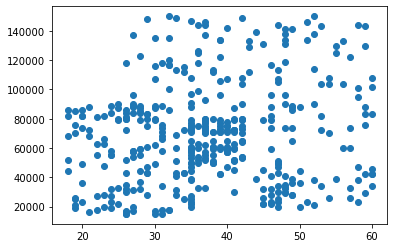

In [20]:
plt.scatter(df["Age"],df["EstimatedSalary"])

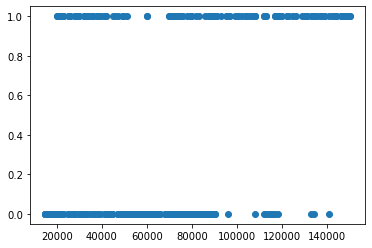

In [21]:
plt.scatter(df["EstimatedSalary"],df["Purchased"])

### PERFORMANCE METRICS

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.925

### Confusion matrix model evaluation technique

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cm=confusion_matrix(y_test,y_pred) # True +ve, False -ve, False +ve, True -ve
cm

array([[58,  0],
       [ 6, 16]], dtype=int64)

In [25]:
import sklearn.metrics as metrics

### F1 score

In [26]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.8421052631578948

### Precision score

In [27]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.90625, 1.     ])

### Classification report

In [28]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      1.00      0.95        58\n           1       1.00      0.73      0.84        22\n\n    accuracy                           0.93        80\n   macro avg       0.95      0.86      0.90        80\nweighted avg       0.93      0.93      0.92        80\n'

In [29]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2-score: %.2f (RMSE):" , r2_score(y_test, y_pred) )

Mean Absolute Error: 0.075
Mean Squared Error: 0.075
Root Mean Squared Error: 0.27386127875258304
R2-score: %.2f (RMSE): 0.6238244514106583


### Confusion matrix heatmap

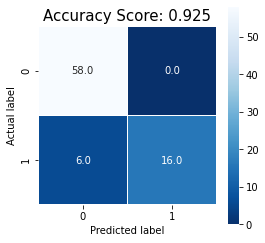

In [30]:
plt.figure(figsize=(4,4))
sb.heatmap(metrics.confusion_matrix(y_test,y_pred), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);